<a href="https://colab.research.google.com/github/edoaurahman/PCVK/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Menghubungkan dengan Google Drive**

In [117]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**2. Transformasi Linear Brighness**

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan (-255 - 255): 50


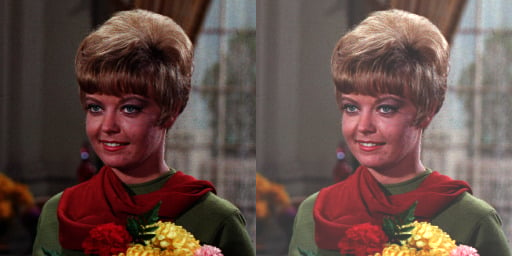

In [118]:

print("Mengubah tingkat kecerahan citra")
print("--------------------------------")

try:
  brightness = int(input("Masukkan nilai kecerahan (-255 - 255): "))
except ValueError:
  print("Error, not a number")

original = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/female.jpg")
brightness_image = np.zeros(original.shape, original.dtype)

# Akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.covertScaleAbs(original,beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)


#**Tugas Praktikum**
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

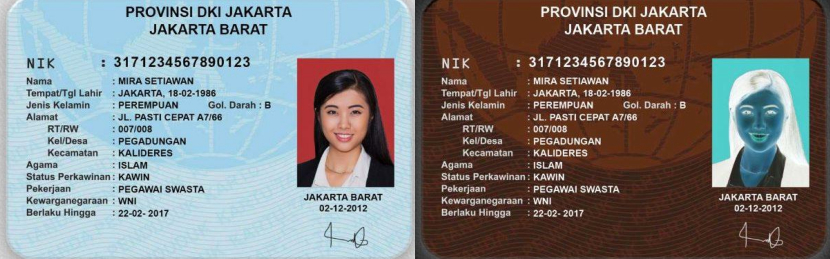

In [119]:
ktp = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/ktp.jpg")
inverse_image = ktp.copy()

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    for c in range(ktp.shape[2]):
      inverse_image[y,x,c] = np.clip(255 - ktp[y,x,c], 0, 255)

final_frame = cv.hconcat([ktp, inverse_image])
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Masukkan nilai kecerahan (-255 - 255): 50
Masukkan nilai kontras (1.0 - 3.0): 2


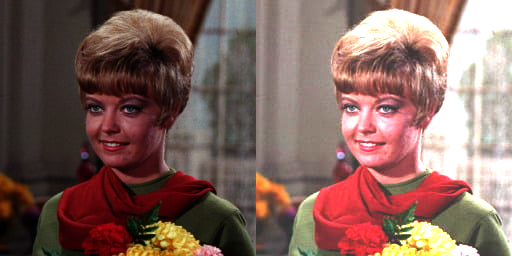

In [120]:
contrast_image = original.copy()

try:
  brightness = int(input("Masukkan nilai kecerahan (-255 - 255): "))
except ValueError:
  print("Error, not a number")

try:
  contrast = int(input("Masukkan nilai kontras (1.0 - 3.0): "))
except ValueError:
  print("Error, not a number")

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip((contrast * original[y,x,c]) + brightness, 0, 255)

final_frame = cv.hconcat([original, contrast_image])
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

Masukkan nilai kecerahan (-255 - 255): 50


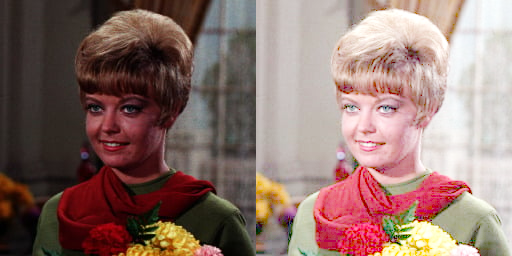

In [121]:
# Ubah kecerahan dengan transformasi log
# s = c ∗ log(1 + r)
# c : konstanta
# r : nilai grey-level citra input
# s : nilai grey-level citra output

brightness_image = original.copy()

try:
  brightness = int(input("Masukkan nilai kecerahan (-255 - 255): "))
except ValueError:
  print("Error, not a number")

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * np.log(1 + original[y,x,c]), 0, 255)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

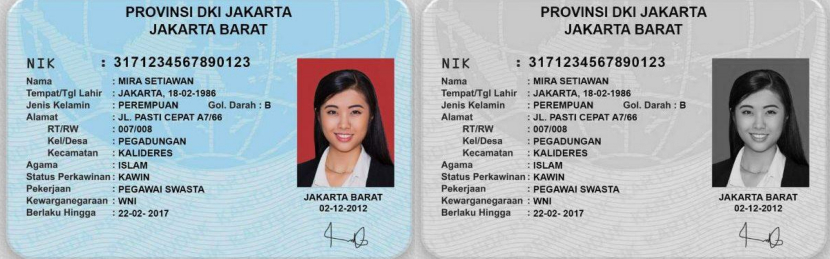

In [144]:
# Grayscale Menggunakan Averaging

ktp_averaging = ktp.copy()

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    r = ktp[y,x,2]
    g = ktp[y,x,1]
    b = ktp[y,x,0]
    ktp_averaging[y, x] = np.mean([r,g,b])

final_frame = cv.hconcat([ktp, ktp_averaging])
cv2_imshow(final_frame)

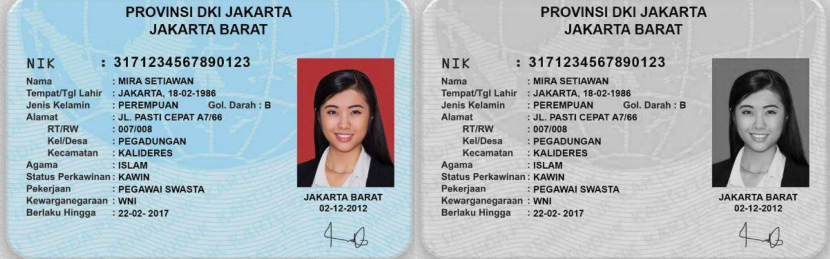

In [158]:
# Grayscale menggunakan lightness

ktp_lightness = ktp.copy()

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    r = ktp[y,x,2]
    g = ktp[y,x,1]
    b = ktp[y,x,0]
    max = np.max([r,g,b]).astype(int)
    min = np.min([r,g,b]).astype(int)
    ktp_lightness[y,x] = ((max + min) / 2)

final_frame = cv.hconcat([ktp, ktp_lightness])
cv2_imshow(final_frame)


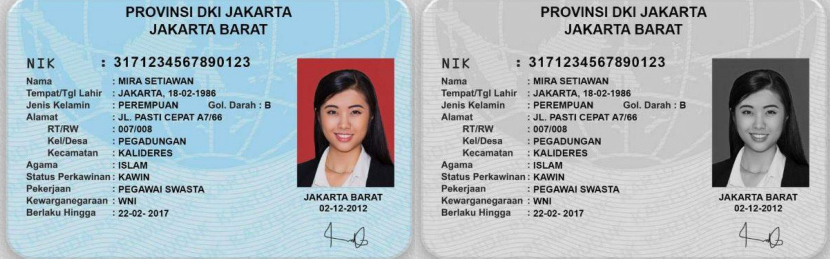

In [124]:
# Menggunakan Luminosity

ktp_luminosity = ktp.copy()

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    r = ktp[y,x,2]
    g = ktp[y,x,1]
    b = ktp[y,x,0]
    ktp_luminosity[y,x] = 0.21 * r + 0.72 * g + 0.07 * b

final_frame = cv.hconcat([ktp, ktp_luminosity])
cv2_imshow(final_frame)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

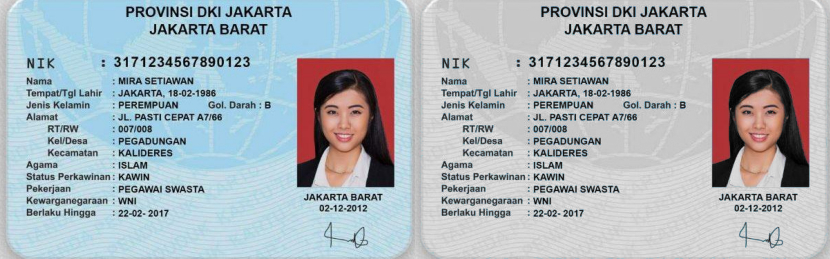

In [125]:
# Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale.
red_ktp_color = ktp.copy()
lower_red = np.array([0, 0, 80])
upper_red = np.array([200, 255, 255])

mask = cv.inRange(ktp, lower_red, upper_red)

# Membuat versi grayscale dari gambar asli
gray = ktp.copy()

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    r = ktp[y,x,2]
    g = ktp[y,x,1]
    b = ktp[y,x,0]
    gray[y,x] = 0.21 * r + 0.72 * g + 0.07 * b

# Gabungkan gambar berwarna merah dengan gambar grayscale
red_ktp_color = np.where(mask[:, :,np.newaxis] == 255, red_ktp_color, gray)

# Gabungkan gambar asli dan hasil untuk perbandingan
final_frame = cv.hconcat([ktp, red_ktp_color])
cv2_imshow(final_frame)